In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deepfashion-1/datasets/train_images/WOMEN-Sweaters-id_00005253-06_1_front.png
/kaggle/input/deepfashion-1/datasets/train_images/WOMEN-Blouses_Shirts-id_00004602-01_4_full.png
/kaggle/input/deepfashion-1/datasets/train_images/WOMEN-Blouses_Shirts-id_00007196-04_4_full.png
/kaggle/input/deepfashion-1/datasets/train_images/MEN-Tees_Tanks-id_00004170-05_4_full.png
/kaggle/input/deepfashion-1/datasets/train_images/WOMEN-Tees_Tanks-id_00003917-73_4_full.png
/kaggle/input/deepfashion-1/datasets/train_images/WOMEN-Tees_Tanks-id_00005292-05_7_additional.png
/kaggle/input/deepfashion-1/datasets/train_images/MEN-Jackets_Vests-id_00000094-02_7_additional.png
/kaggle/input/deepfashion-1/datasets/train_images/WOMEN-Dresses-id_00002507-01_7_additional.png
/kaggle/input/deepfashion-1/datasets/train_images/WOMEN-Dresses-id_00001475-03_7_additional.png
/kaggle/input/deepfashion-1/datasets/train_images/WOMEN-Shorts-id_00003578-02_4_full.png
/kaggle/input/deepfashion-1/datasets/train_images/

In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [3]:
seg_images_dir = '/kaggle/input/deepfashion-1/datasets/segm/'
seg_images_filenames_list = os.listdir(seg_images_dir)
seg_images_paths = [seg_images_dir + file for file in seg_images_filenames_list]
print(seg_images_paths[:5])
print(len(seg_images_paths))

['/kaggle/input/deepfashion-1/datasets/segm/WOMEN-Dresses-id_00007947-05_4_full_segm.png', '/kaggle/input/deepfashion-1/datasets/segm/WOMEN-Jackets_Coats-id_00004891-02_2_side_segm.png', '/kaggle/input/deepfashion-1/datasets/segm/WOMEN-Dresses-id_00005748-01_1_front_segm.png', '/kaggle/input/deepfashion-1/datasets/segm/WOMEN-Tees_Tanks-id_00006687-05_4_full_segm.png', '/kaggle/input/deepfashion-1/datasets/segm/WOMEN-Pants-id_00000478-02_1_front_segm.png']
11484


In [4]:
train_image_path = "/kaggle/input/deepfashion-1/datasets/train_images/"
segmentation_path = "/kaggle/input/deepfashion-1/datasets/segm/"

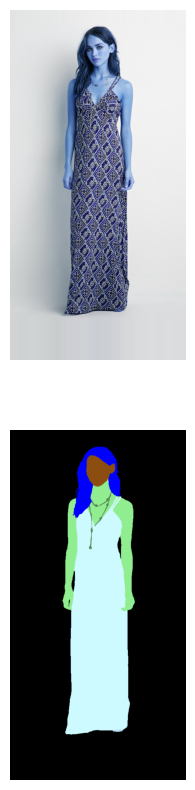

In [5]:
def load_image(image_id):
    img = cv2.imread(os.path.join(train_image_path, image_id))
    return img

def load_mask(image_id):
    mask = cv2.imread(os.path.join(segmentation_path, image_id))
    return mask
def get_mask_filename(image_id):
    return image_id.replace('.png', '_segm.png')

image_id = "WOMEN-Dresses-id_00006392-02_1_front.png"
image = load_image(image_id)
mask = load_mask(get_mask_filename(image_id))

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(mask)
plt.axis('off')

plt.show()

In [6]:
print(image.shape)

(1024, 512, 3)


In [7]:
print(mask.dtype)

uint8


In [8]:
import os
dir_path = '/kaggle/input/deepfashion-1/datasets/segm/'
file_count = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
print(file_count)

11484


In [9]:
import os
dir_path = '/kaggle/input/deepfashion-1/datasets/train_images/'
file_count = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
print(file_count)

10335


In [10]:
from sklearn.model_selection import train_test_split

image_dir = '/kaggle/input/deepfashion-1/datasets/train_images'
mask_dir = '/kaggle/input/deepfashion-1/datasets/segm'

image_filenames = os.listdir(image_dir)
mask_filenames = os.listdir(mask_dir)

image_paths = []
mask_paths = []
for image in image_filenames:
    mask_name = image.replace('.png', '_segm.png')
    if mask_name in mask_filenames:
        image_paths.append(os.path.join(image_dir, image))
        mask_paths.append(os.path.join(mask_dir, mask_name))

train_images, val_images, train_masks, val_masks = train_test_split(
    image_paths,
    mask_paths,
    test_size=0.2, 
    random_state=42
)

In [11]:
def process_image(image_path, mask_path, image_size=(128, 128)):
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path)
    
    image = cv2.resize(image, img_size)
    mask = cv2.resize(mask, img_size)
    
    image = image / 255.0
    
    return image, mask

In [12]:
img_size = (128, 128)

def process_dataset(image_paths, mask_paths, img_size=(128, 128)):
    images = []
    masks = []

    for img_path, mask_path in zip(image_paths, mask_paths):
        img, mask = process_image(img_path, mask_path)
        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

In [13]:
train_images, train_masks = process_dataset(train_images, train_masks)
val_images, val_masks = process_dataset(val_images, val_masks)

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNetV2

def unet_mobilenetv2(input_size=(128, 128, 3)):
    base_model = MobileNetV2(input_shape=input_size, include_top=False)

    # Utilisation des activations de certaines couches
    layer_names = [
        'block_1_expand_relu',   # 64x64
        'block_3_expand_relu',   # 32x32
        'block_6_expand_relu',   # 16x16
        'block_13_expand_relu',  # 8x8
        'block_16_project',      # 4x4
    ]
    
    base_model_outputs = [base_model.get_layer(name).output for name in layer_names]
    down_stack = Model(inputs=base_model.input, outputs=base_model_outputs)
    down_stack.trainable = False  # Geler les poids du modèle de base

    # Définir le modèle U-Net
    inputs = layers.Input(shape=input_size)
    skips = down_stack(inputs)
    
    # U-Net architecture
    x = skips[-1]  # La dernière couche de base
    for i in range(len(skips) - 2, -1, -1):  # Remonter les couches de skip
        x = layers.Conv2DTranspose(256 // (2**i), (2, 2), strides=(2, 2), padding="same")(x)
        x = layers.concatenate([x, skips[i]])
        x = layers.Conv2D(256 // (2**i), (3, 3), padding="same")(x)
        x = layers.Conv2D(256 // (2**i), (3, 3), padding="same")(x)

    x = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(x)
    outputs = layers.Conv2D(3, (1, 1), activation="sigmoid")(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

# Crée le modèle
model = unet_mobilenetv2()
model.summary()  # Affiche la structure du modèle


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_9        │ [(None, 64, 64,   │  1,841,984 │ input_layer_5[0]… │
│ (Functional)        │ 96), (None, 32,   │            │                   │
│                     │ 32, 144), (None,  │            │                   │
│                     │ 16, 16, 192),     │            │                   │
│                     │ (None, 8, 8,      │            │                   │
│                     │ 576), (None, 4,   │            │                   │
│                     │ 4, 320)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_8  │ (None, 8, 8, 32)  │     40,992 │ functional_9[0][… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 8, 8, 608) │          0 │ conv2d_transpose… │
│ (Concatenate)       │                   │            │ functional_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 8, 8, 32)  │    175,136 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 8, 8, 32)  │      9,248 │ conv2d_18[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_9  │ (None, 16, 16,    │      8,256 │ conv2d_19[0][0]   │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 16, 16,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 256)              │            │ functional_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 16, 16,    │    147,520 │ concatenate_9[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 16, 16,    │     36,928 │ conv2d_20[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_10 │ (None, 32, 32,    │     32,896 │ conv2d_21[0][0]   │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 32, 32,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 272)              │            │ functional_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 32, 32,    │    313,472 │ concatenate_10[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │    147,584 │ conv2d_22[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_11 │ (None, 64, 64,    │    131,328 │ conv2d_23[0][0]   │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 64, 64,    │          0 │ conv2d_transpose

 Total params: 4,352,483 (16.60 MB)

 Trainable params: 2,510,499 (9.58 MB)

 Non-trainable params: 1,841,984 (7.03 MB)

In [26]:
# Compilation du modèle
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [27]:
model.fit(
    train_images, train_masks,
    validation_data=(val_images, val_masks),
    epochs=25,
    batch_size=32
)

Epoch 1/25


I0000 00:00:1729096502.604995     685 service.cc:145] XLA service 0x7d1544001df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729096502.605092     685 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-10-16 16:35:15.498985: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[256,352,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,352,64,64]{3,2,1,0}, f32[32,256,64,64]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-16 16:35:18.546217: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 4.047372229s
Trying algorithm eng0{} for conv

  1/259 ━━━━━━━━━━━━━━━━━━━━ 1:58:42 28s/step - accuracy: 0.3449 - loss: -2.3671

I0000 00:00:1729096522.212640     685 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


258/259 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4984 - loss: nan

2024-10-16 16:35:53.659917: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[256,352,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[12,352,64,64]{3,2,1,0}, f32[12,256,64,64]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-16 16:35:54.180041: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.520227924s
Trying algorithm eng0{} for conv (f32[256,352,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[12,352,64,64]{3,2,1,0}, f32[12,256,64,64]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_con

259/259 ━━━━━━━━━━━━━━━━━━━━ 73s 177ms/step - accuracy: 0.4968 - loss: nan - val_accuracy: 0.1253 - val_loss: nan
Epoch 2/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.1257 - loss: nan - val_accuracy: 0.1253 - val_loss: nan
Epoch 3/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.1250 - loss: nan - val_accuracy: 0.1253 - val_loss: nan
Epoch 4/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.1256 - loss: nan - val_accuracy: 0.1253 - val_loss: nan
Epoch 5/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.1250 - loss: nan - val_accuracy: 0.1253 - val_loss: nan
Epoch 6/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.1253 - loss: nan - val_accuracy: 0.1253 - val_loss: nan
Epoch 7/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.1251 - loss: nan - val_accuracy: 0.1253 - val_loss: nan
Epoch 8/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.1251 - loss: nan - val_accuracy: 0.1253 - val_loss: nan
Epoch 9/25
